In [1]:
### What it does: dPSI correlation plot and permutation test, Figure 1E and F, Figure S1B
## Date modified: 2025/04/16
## input: csv file with significantly altered dPSI values and gene_names (output from script 1), whippet_output.csv 



In [9]:
#load packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [10]:
#Read whippet files
all_whippet= pd.read_csv('ctr_vs_eif_kd.csv')
significant = pd.read_csv("sig_whip_CE_prob0.9_dPSI_0.1.csv")


In [11]:
# count how many genes whippet found expressed (for permutation test below)
num_unique_genes = all_whippet['Gene'].nunique()
print(f"Number of unique genes: {num_unique_genes}")

Number of unique genes: 14297


In [12]:
#Select genes with two at least paired exons that are significantly spliced 
print(f"There are {str(len(significant))} differentially spliced exons")

multi_exon_genes = list(significant.Gene.value_counts().loc[lambda x: x>=2].index)

print(f"There are {str(len(multi_exon_genes))} genes with multiple diff. spliced exons")

#Generate dataframe of paired exon genes
res_df = significant.loc[significant.Gene.isin(multi_exon_genes)]

#Find genes with more than one pair of sig. exons
more_than_two = list(significant.Gene.value_counts().loc[lambda x: x>=3].index)
print(f"There are {str(len(more_than_two))} genes with more than two diff. spliced exons...subsetting only one pair per gene")

#New df with entries with more than two paired exons (take only first two exon pairs)
append_df = pd.DataFrame()
for i in more_than_two:
    more_df = res_df.loc[res_df.Gene == i].head(2)
    append_df = pd.concat([append_df, more_df])

# drop entries with more than two paired exons and add back in trimmed pairs
res_df = res_df.drop(res_df.loc[res_df.Gene.isin(more_than_two)].index)

#Add back first two exons paires 
res_df = pd.concat([res_df, append_df])

There are 7098 differentially spliced exons
There are 1618 genes with multiple diff. spliced exons
There are 902 genes with more than two diff. spliced exons...subsetting only one pair per gene


In [13]:
pairs = []
pairs_ids = []
for i in np.unique(res_df.Gene):
    test_df = res_df.loc[(res_df.Gene == i)]
    test = np.array(test_df.dPSI)
    test_ids = np.array(test_df.Coord)
    pairs_ids.append(test_ids)
    pairs.append(test)
pair_arr = np.vstack(pairs)
pair_ids = np.vstack(pairs_ids) 

In [14]:
pearsonr(pair_arr[:,0], pair_arr[:,1])

PearsonRResult(statistic=0.5795380574651898, pvalue=8.27036610803557e-146)

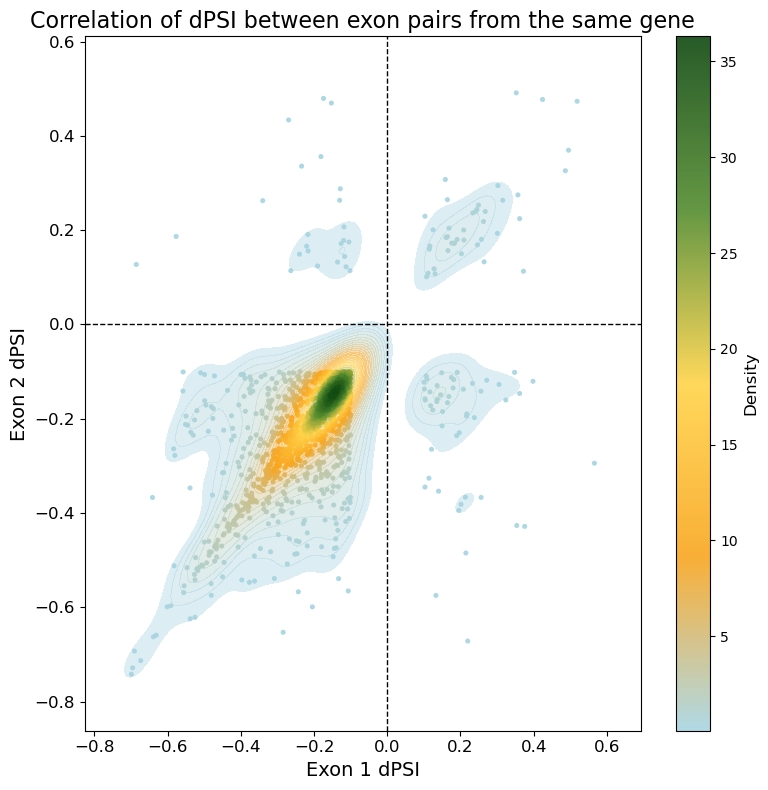

In [15]:
# Define custom color palette 
custom_colors = ["#A8D5E2", "#F9A620", "#FFD449", "#548C2F", "#104911"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Defining x and y
x = pair_arr[:, 0]
y = pair_arr[:, 1]

# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Normalize density values for better color mapping
norm = mcolors.Normalize(vmin=z.min(), vmax=z.max())

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot with density-based coloring
scatter = ax.scatter(
    x, y, c=z, s=7, cmap=custom_cmap, norm=norm, alpha=0.9
)

# Add a smoother KDE density plot using the same colormap
sns.kdeplot(
    x=x, y=y, levels=30, fill=True, cmap=custom_cmap, alpha=0.4, ax=ax, thresh=0.05
)

# Add vertical and horizontal reference lines at 0
ax.axvline(0, color="black", linestyle="--", linewidth=1)
ax.axhline(0, color="black", linestyle="--", linewidth=1)

# Set labels and title
ax.set_xlabel("Exon 1 dPSI", fontsize=14)
ax.set_ylabel("Exon 2 dPSI", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title("Correlation of dPSI between exon pairs from the same gene", fontsize=16)

# Add a scaled color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Density", fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Adjust layout and save the plot
plt.tight_layout()

plt.savefig('correlation_dPSI_exonPairs_whippet_eif4a3_smash.pdf')
)
plt.show()


In [20]:
#Test whether pearson R correlation is more than expected by random chance
np.random.shuffle(pair_arr[:,0])

In [21]:
pearsonr(pair_arr[:,0], pair_arr[:,1])

PearsonRResult(statistic=-0.009711333807940559, pvalue=0.6962854433644955)

In [ ]:
# Define custom color palette (same as previous)
custom_colors = ["#A8D5E2", "#F9A620", "#FFD449", "#548C2F", "#104911"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Defining x and y
x = pair_arr[:, 0]
y = pair_arr[:, 1]

# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Normalize density values for better color mapping
norm = mcolors.Normalize(vmin=z.min(), vmax=z.max())

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot with density-based coloring
scatter = ax.scatter(
    x, y, c=z, s=7, cmap=custom_cmap, norm=norm, alpha=0.9
)

# Add a smoother KDE density plot using the same colormap
sns.kdeplot(
    x=x, y=y, levels=30, fill=True, cmap=custom_cmap, alpha=0.4, ax=ax, thresh=0.05
)

# Add vertical and horizontal reference lines at 0
ax.axvline(0, color="black", linestyle="--", linewidth=1)
ax.axhline(0, color="black", linestyle="--", linewidth=1)

# Set labels and title
ax.set_xlabel("Exon 1 dPSI", fontsize=14)
ax.set_ylabel("Exon 2 dPSI", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title("Correlation of dPSI between random exon pairs", fontsize=16)

# Add a scaled color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Density", fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('correlation_dPSI_RANDOM_exonPairs_whippet_eif4a3_smash.pdf')
plt.show()


In [ ]:
### ---- PERMUTATION TEST ----- 
### test significance of observing multiple splice events per gene

# Define parameters
total_genes = num_unique_genes  # Total expressed genes
total_splicing_changes = len(significant)  # Total splicing changes
observed_multiple_changes = len(multi_exon_genes)  # Observed genes with 2+ changes
num_permutations = 100000  # Number of random simulations

# Store results from permutations
multiple_changes_counts = []

# Perform permutations
for _ in range(num_permutations):
    # Randomly distribute splicing changes across all genes
    assigned_changes = np.random.choice(total_genes, total_splicing_changes, replace=True)
    
    # Count occurrences of changes per gene
    unique, counts = np.unique(assigned_changes, return_counts=True)
    
    # Count how many genes have 2+ changes
    multiple_changes = np.sum(counts >= 2)
    
    # Store result
    multiple_changes_counts.append(multiple_changes)

# Compute p-value: fraction of simulations where count >= observed count
p_value = (np.sum(np.array(multiple_changes_counts) >= observed_multiple_changes) + 1) / (num_permutations + 1) 

# Format p-value to show significant digits
p_value_formatted = f'{p_value:.2e}'


# Define color palette
custom_colors = ["#A8D5E2", "#F9A620", "#FFD449", "#548C2F", "#104911"]

# Plot the permutation results 
plt.figure(figsize=(8, 6))

# Histogram 
plt.hist(multiple_changes_counts, bins=50, alpha=0.85, edgecolor='black', color=custom_colors[1])  

# Observed value line with dark green
plt.axvline(observed_multiple_changes, color=custom_colors[4], linestyle='dashed', linewidth=2, label=f'Observed: {observed_multiple_changes}')

# Labels and title
plt.xlabel('Number of Genes with 2+ exons altered', fontsize=14)
plt.ylabel('Number of permutations', fontsize=14)
plt.legend(fontsize=12)

# Save figure
filename = f'permutation_test_whippet_eif4a3depletion_diffSplice_pval_{p_value_formatted}.pdf'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# Print result
print(f'P-value: {p_value_formatted}')
